In [1]:
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
file = files.upload()

df = pd.read_csv("Airbnb.csv")
df.head()

Saving Airbnb.csv to Airbnb.csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0


Preprocessing the dataset:

In [2]:
df_dup = df
len(df_dup)

48895

In [3]:
#Replace the missing values in col reviews_per_month to "mean"
x = np.mean(df_dup.reviews_per_month)
df_dup.reviews_per_month = df_dup.reviews_per_month.fillna(x)
x

1.3732214298586884

In [4]:
df_dup.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.100000,1,0


In [5]:
df_dup['last_review'].isna().sum()


10052

In [6]:
#Replace the missing values in col last_review to "never" since the col has string values 

df_dup.last_review = df_dup.last_review.fillna("never")

In [7]:
#Convert categorical values of col neighbourhood_group to numerical by creating dummy variables

df_dup = pd.get_dummies(df_dup, columns=['neighbourhood_group'])

In [8]:
#Convert categorical values of col room_type to numerical by creating dummy variables

df_dup = pd.get_dummies(df_dup, columns=['room_type'])

In [9]:
len(df_dup)

48895

In [10]:
#Droping col id, host_id, name, host_name and neighbourhood since it is not required for predicting price 

#Droping col last_review since its a string so not useful for prediction 

data = df_dup.drop(["name","host_name","last_review","id","host_id","neighbourhood"],axis=1)

data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,0,1,0,0,1,0,0


In [11]:
#Verify that we don't have any missing values 

data.isnull().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_Bronx            0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Entire home/apt            0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

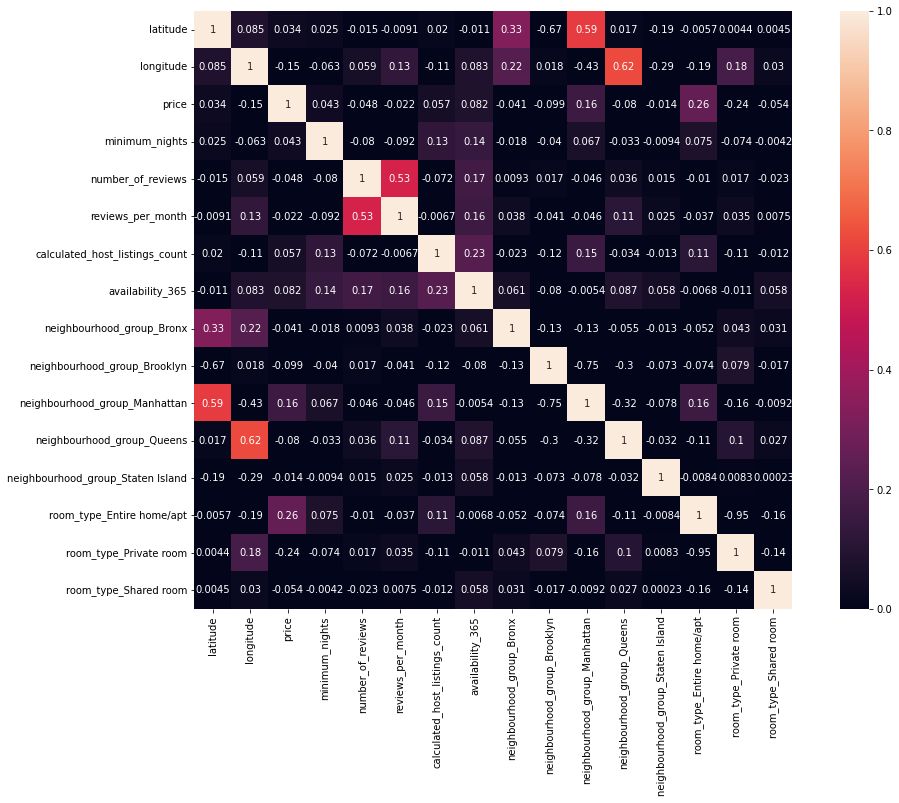

In [12]:
#To check if any other variables are highly correlated 

plt.figure(figsize=(17,11))
matrix = data.corr()
sns.heatmap(matrix,square=True, annot=True,vmin=0, vmax=1)

Convert target variable into classification:



In [13]:
#Converting the Price col values into high, medium and low categories to classify 

data['price'] = pd.cut(data['price'], bins = [data['price'].min(),
                                              data['price'].quantile(0.25),
                                              data['price'].quantile(0.75),
                                              data['price'].max()],
                                              labels = ["Low", "Medium", "High"])
data['price'].value_counts()

Medium    24347
Low       12360
High      12177
Name: price, dtype: int64

In [14]:
#To check for null values on price col

data[data.price.isnull()]
x = data.price.isna().sum()
x

11

In [15]:
#Drop the NaN values for classification

data = data.dropna()
df1 = data

Without scaling

In [16]:
#Since 'price' is the response variable 

y = data['price'] 
data=data.drop(['price'],axis=1)
data.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,1,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,1,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,3,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,1,270,4.640000,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,10,9,0.100000,1,0,0,0,1,0,0,1,0,0


Partitioning:

In [17]:
#Partition the data into 75% training and 25% validation set

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, y, random_state=0, test_size=0.25)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(36663, 15) (12221, 15) (36663,) (12221,)


Implementation of Models:

1. Using KNN Model

In [18]:
#To get the best k value 

import sklearn.metrics as metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

value = []
for i in range(5,20):
 knn = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
 predict = knn.predict(X_valid)
 err = np.mean(predict != y_valid)
 value.append(err)
 print('k =',i,'for value:',err)

#The best value of k is 19 since it has a low error rate 

k = 5 for value: 0.4754111774813845
k = 6 for value: 0.46575566647573846
k = 7 for value: 0.45994599459945995
k = 8 for value: 0.461909827346371
k = 9 for value: 0.4552818918255462
k = 10 for value: 0.4511087472383602
k = 11 for value: 0.4499631781359954
k = 12 for value: 0.44701742901562885
k = 13 for value: 0.447426560837902
k = 14 for value: 0.4454627280909909
k = 15 for value: 0.44456263808199004
k = 16 for value: 0.4469356026511742
k = 17 for value: 0.4452990753620817
k = 18 for value: 0.44423533262417153
k = 19 for value: 0.4417805416905327


In [19]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import classification_report

knn = neighbors.KNeighborsClassifier(n_neighbors = 19).fit(X_train,y_train)
predict = knn.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for k = 19 is', score)

#The model has an accuracy of 55% 

              precision    recall  f1-score   support

        High       0.52      0.36      0.43      2995
         Low       0.57      0.39      0.47      3165
      Medium       0.56      0.74      0.64      6061

    accuracy                           0.56     12221
   macro avg       0.55      0.50      0.51     12221
weighted avg       0.56      0.56      0.54     12221

Accuracy Score for k = 19 is 0.5582194583094673


2. Using Tree Model:

In [20]:
#DecisionTree

from pathlib import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
import matplotlib.pylab as plt

for i in np.arange(1, 20):
  classTree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=0.005, random_state=0).fit(X_train, y_train)
  predict = classTree.predict(X_valid)
  err = np.mean(predict != y_valid)
  value.append(err)
  print('Depth =',i,'for value:',err)

#The best value of depth is 10 since it has a low error rate

Depth = 1 for value: 0.475083872023566
Depth = 2 for value: 0.3836019965632927
Depth = 3 for value: 0.3516078880615334
Depth = 4 for value: 0.33900662793552083
Depth = 5 for value: 0.33696096882415516
Depth = 6 for value: 0.32378692414696014
Depth = 7 for value: 0.31846821045740936
Depth = 8 for value: 0.3213321332133213
Depth = 9 for value: 0.3167498568038622
Depth = 10 for value: 0.3152769822436789
Depth = 11 for value: 0.3158497667948613
Depth = 12 for value: 0.3158497667948613
Depth = 13 for value: 0.3158497667948613
Depth = 14 for value: 0.3158497667948613
Depth = 15 for value: 0.3158497667948613
Depth = 16 for value: 0.3158497667948613
Depth = 17 for value: 0.3158497667948613
Depth = 18 for value: 0.3158497667948613
Depth = 19 for value: 0.3158497667948613


In [21]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

classTree = DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=0.005).fit(X_train, y_train)
predict = classTree.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for depth = 10 is', score)

#The model has an accuracy of 68%

              precision    recall  f1-score   support

        High       0.69      0.53      0.60      2995
         Low       0.69      0.77      0.73      3165
      Medium       0.68      0.72      0.70      6061

    accuracy                           0.68     12221
   macro avg       0.69      0.67      0.68     12221
weighted avg       0.69      0.68      0.68     12221

Accuracy Score for depth = 10 is 0.684723017756321


In [22]:
#RandomForest

from pathlib import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
import matplotlib.pylab as plt

for i in np.arange(1, 20):
  classTree = RandomForestClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
  predict = classTree.predict(X_valid)
  err = np.mean(predict != y_valid)
  value.append(err)
  print('Depth =',i,'for value:',err)

#The best value of depth is 19 since it has a low error rate

Depth = 1 for value: 0.504050405040504
Depth = 2 for value: 0.4279518860977007
Depth = 3 for value: 0.35586285901317405
Depth = 4 for value: 0.3457163898208003
Depth = 5 for value: 0.3399067179445217
Depth = 6 for value: 0.3344243515260617
Depth = 7 for value: 0.32591440962278045
Depth = 8 for value: 0.3174044677194992
Depth = 9 for value: 0.31151296947876606
Depth = 10 for value: 0.30758530398494394
Depth = 11 for value: 0.30439407577121347
Depth = 12 for value: 0.301202847557483
Depth = 13 for value: 0.29645691841911465
Depth = 14 for value: 0.29408395384993047
Depth = 15 for value: 0.2927747320186564
Depth = 16 for value: 0.2962114393257508
Depth = 17 for value: 0.2948203911300221
Depth = 18 for value: 0.2969478766058424
Depth = 19 for value: 0.29596596023238686


In [23]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

classTree = RandomForestClassifier(max_depth=19, random_state=0).fit(X_train, y_train)
predict = classTree.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for depth = 19 is', score)

#The model has an accuracy of 70%

              precision    recall  f1-score   support

        High       0.70      0.59      0.64      2995
         Low       0.72      0.76      0.74      3165
      Medium       0.70      0.73      0.71      6061

    accuracy                           0.70     12221
   macro avg       0.71      0.70      0.70     12221
weighted avg       0.70      0.70      0.70     12221

Accuracy Score for depth = 19 is 0.7040340397676131


In [24]:
#xgBoost
from pathlib import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pylab as plt

for i in np.arange(1, 20):
  classTree = XGBClassifier(max_depth=i, eta=0.01).fit(X_train, y_train)
  predict = classTree.predict(X_valid)
  err = np.mean(predict != y_valid)
  value.append(err)
  print('Depth =',i,'for value:',err)

#The best value of depth is 10 since it has a low error rate

Depth = 1 for value: 0.34514360526961785
Depth = 2 for value: 0.3251779723426888
Depth = 3 for value: 0.3099582685541281
Depth = 4 for value: 0.30185745847312007
Depth = 5 for value: 0.29711152933475166
Depth = 6 for value: 0.2942476065788397
Depth = 7 for value: 0.2939203011210212
Depth = 8 for value: 0.29449308567220356
Depth = 9 for value: 0.2947385647655675
Depth = 10 for value: 0.29662057114802387
Depth = 11 for value: 0.2971933556992063
Depth = 12 for value: 0.29760248752147944
Depth = 13 for value: 0.29858440389493496
Depth = 14 for value: 0.3032485066688487
Depth = 15 for value: 0.30185745847312007
Depth = 16 for value: 0.3008755420996645
Depth = 17 for value: 0.30292120121103017
Depth = 18 for value: 0.3023484166598478
Depth = 19 for value: 0.3025120693887571


In [25]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

classTree = XGBClassifier(max_depth=10, eta=0.01).fit(X_train, y_train)
predict_XG = classTree.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for depth = 10 is', score)

#The model has an accuracy of 70%

              precision    recall  f1-score   support

        High       0.69      0.60      0.64      2995
         Low       0.72      0.74      0.73      3165
      Medium       0.69      0.73      0.71      6061

    accuracy                           0.70     12221
   macro avg       0.70      0.69      0.69     12221
weighted avg       0.70      0.70      0.70     12221

Accuracy Score for depth = 10 is 0.6974879306112429


Logistic Regression

In [26]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)
predict_LR = model.predict(X_valid)
prob = model.predict_proba(X_valid)

print('Accuracy Score:',model.score(X_valid,y_valid))
#Classification report
print(metrics.classification_report(y_valid,predict_LR,digits=2))

Accuracy Score: 0.6293265690205384
              precision    recall  f1-score   support

        High       0.69      0.40      0.50      2995
         Low       0.61      0.74      0.67      3165
      Medium       0.62      0.69      0.65      6061

    accuracy                           0.63     12221
   macro avg       0.64      0.61      0.61     12221
weighted avg       0.64      0.63      0.62     12221



Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

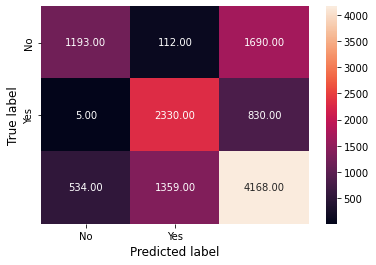

In [27]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_valid,predict_LR)
cm
#####

import seaborn as sn
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [28]:
LR = pd.DataFrame({'Actual' : y_valid,'Predicted': predict_LR})
LR.head

<bound method NDFrame.head of        Actual Predicted
3474   Medium    Medium
37387     Low       Low
44147  Medium       Low
40228  Medium    Medium
36090  Medium    Medium
...       ...       ...
36839  Medium       Low
23985     Low       Low
15692    High    Medium
36556    High      High
40802  Medium      High

[12221 rows x 2 columns]>

3. Using Naive Bayes Model:

In [29]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

Naive = GaussianNB().fit(X_train, y_train)
predict = Naive.predict(X_valid)

In [30]:
#Check accuracy 

score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score is', score)

#The model has an accuracy of 57%

              precision    recall  f1-score   support

        High       0.49      0.80      0.61      2995
         Low       0.59      0.76      0.66      3165
      Medium       0.65      0.35      0.46      6061

    accuracy                           0.57     12221
   macro avg       0.58      0.64      0.58     12221
weighted avg       0.59      0.57      0.55     12221

Accuracy Score is 0.5671385320350217


Scaling

In [31]:
#Rescaling the data. Note that dummy variables are not recscaled

data1 = df1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']] = scaler.fit_transform(data1[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']])
data1.head()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.493872,-0.437504,Medium,-0.293969,-0.320353,-0.776628,-0.034732,1.916192,0,1,0,0,0,0,1,0
1,0.452352,-0.684480,High,-0.293969,0.487712,-0.663119,-0.156107,1.840219,0,0,1,0,0,1,0,0
2,1.468284,0.222616,Medium,-0.196465,-0.522369,0.000050,-0.186450,1.916192,0,0,1,0,0,0,1,0
3,-0.803442,-0.164313,Medium,-0.293969,5.538118,2.181262,-0.186450,0.617056,0,1,0,0,0,1,0,0
4,1.275551,0.177337,Medium,0.144799,-0.320353,-0.850074,-0.186450,-0.856818,0,0,1,0,0,1,0,0


In [32]:
#Since 'price' is the response variable 

y = data1['price'] 
data1=data1.drop(['price'],axis=1)
data1.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.493872,-0.437504,-0.293969,-0.320353,-0.776628,-0.034732,1.916192,0,1,0,0,0,0,1,0
1,0.452352,-0.684480,-0.293969,0.487712,-0.663119,-0.156107,1.840219,0,0,1,0,0,1,0,0
2,1.468284,0.222616,-0.196465,-0.522369,0.000050,-0.186450,1.916192,0,0,1,0,0,0,1,0
3,-0.803442,-0.164313,-0.293969,5.538118,2.181262,-0.186450,0.617056,0,1,0,0,0,1,0,0
4,1.275551,0.177337,0.144799,-0.320353,-0.850074,-0.186450,-0.856818,0,0,1,0,0,1,0,0


Partitioning


In [33]:
#Partition the data into 75% training and 25% validation set

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data1, y, random_state=0, test_size=0.25)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(36663, 15) (12221, 15) (36663,) (12221,)


Implementation of Models:

Using KNN Model

In [34]:
#To get the best k value 

import sklearn.metrics as metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

value = []
for i in range(5,20):
 knn = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
 predict = knn.predict(X_valid)
 err = np.mean(predict != y_valid)
 value.append(err)
 print('k =',i,'for value:',err)

k = 5 for value: 0.3483348334833483
k = 6 for value: 0.34113411341134114
k = 7 for value: 0.3339333933393339
k = 8 for value: 0.3311512969478766
k = 9 for value: 0.3255052778005073
k = 10 for value: 0.324032403240324
k = 11 for value: 0.3251779723426888
k = 12 for value: 0.32771458964078226
k = 13 for value: 0.3241960559692333
k = 14 for value: 0.3269781523606906
k = 15 for value: 0.32444153506259715
k = 16 for value: 0.3290238114720563
k = 17 for value: 0.32738728418296376
k = 18 for value: 0.32575075689387123
k = 19 for value: 0.3269781523606906


In [35]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import classification_report

knn = neighbors.KNeighborsClassifier(n_neighbors = 19).fit(X_train,y_train)
predict = knn.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for k = 19 is', score)

#The model has an accuracy of 67% 

              precision    recall  f1-score   support

        High       0.67      0.57      0.61      2995
         Low       0.68      0.73      0.70      3165
      Medium       0.67      0.70      0.68      6061

    accuracy                           0.67     12221
   macro avg       0.67      0.66      0.67     12221
weighted avg       0.67      0.67      0.67     12221

Accuracy Score for k = 19 is 0.6730218476393094


2.Using Tree Model:

In [36]:
#DecisionTree

from pathlib import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
import matplotlib.pylab as plt

for i in np.arange(1, 20):
  classTree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=0.005, random_state=0).fit(X_train, y_train)
  predict = classTree.predict(X_valid)
  err = np.mean(predict != y_valid)
  value.append(err)
  print('Depth =',i,'for value:',err)

#The best value of depth is 10 since it has a low error rate

Depth = 1 for value: 0.475083872023566
Depth = 2 for value: 0.3836019965632927
Depth = 3 for value: 0.3516078880615334
Depth = 4 for value: 0.33900662793552083
Depth = 5 for value: 0.33696096882415516
Depth = 6 for value: 0.32378692414696014
Depth = 7 for value: 0.31846821045740936
Depth = 8 for value: 0.3213321332133213
Depth = 9 for value: 0.3167498568038622
Depth = 10 for value: 0.3152769822436789
Depth = 11 for value: 0.3158497667948613
Depth = 12 for value: 0.3158497667948613
Depth = 13 for value: 0.3158497667948613
Depth = 14 for value: 0.3158497667948613
Depth = 15 for value: 0.3158497667948613
Depth = 16 for value: 0.3158497667948613
Depth = 17 for value: 0.3158497667948613
Depth = 18 for value: 0.3158497667948613
Depth = 19 for value: 0.3158497667948613


In [37]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

classTree = DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=0.005).fit(X_train, y_train)
predict = classTree.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for depth = 10 is', score)

#The model has an accuracy of 68%

              precision    recall  f1-score   support

        High       0.69      0.53      0.60      2995
         Low       0.69      0.77      0.73      3165
      Medium       0.68      0.72      0.70      6061

    accuracy                           0.68     12221
   macro avg       0.69      0.67      0.68     12221
weighted avg       0.69      0.68      0.68     12221

Accuracy Score for depth = 10 is 0.684723017756321


In [38]:
#RandomForest

from pathlib import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
import matplotlib.pylab as plt

for i in np.arange(1, 20):
  classTree = RandomForestClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
  predict = classTree.predict(X_valid)
  err = np.mean(predict != y_valid)
  value.append(err)
  print('Depth =',i,'for value:',err)

#The best value of depth is 19 since it has a low error rate

Depth = 1 for value: 0.504050405040504
Depth = 2 for value: 0.4279518860977007
Depth = 3 for value: 0.35586285901317405
Depth = 4 for value: 0.3457163898208003
Depth = 5 for value: 0.3399067179445217
Depth = 6 for value: 0.33434252516160706
Depth = 7 for value: 0.32591440962278045
Depth = 8 for value: 0.3174044677194992
Depth = 9 for value: 0.31134931674985683
Depth = 10 for value: 0.3075034776204893
Depth = 11 for value: 0.3044759021356681
Depth = 12 for value: 0.301202847557483
Depth = 13 for value: 0.29662057114802387
Depth = 14 for value: 0.29432943294329433
Depth = 15 for value: 0.2934293429342934
Depth = 16 for value: 0.2968660502413878
Depth = 17 for value: 0.2952295229522952
Depth = 18 for value: 0.2968660502413878
Depth = 19 for value: 0.2965387447835693


In [39]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

classTree = RandomForestClassifier(max_depth=19, random_state=0).fit(X_train, y_train)
predict = classTree.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for depth = 19 is', score)

#The model has an accuracy of 70%

              precision    recall  f1-score   support

        High       0.70      0.59      0.64      2995
         Low       0.72      0.76      0.74      3165
      Medium       0.70      0.73      0.71      6061

    accuracy                           0.70     12221
   macro avg       0.70      0.69      0.70     12221
weighted avg       0.70      0.70      0.70     12221

Accuracy Score for depth = 19 is 0.7034612552164308


In [40]:
#xgBoost

from pathlib import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pylab as plt

for i in np.arange(1, 20):
  classTree = XGBClassifier(max_depth=i, eta=0.01).fit(X_train, y_train)
  predict = classTree.predict(X_valid)
  err = np.mean(predict != y_valid)
  value.append(err)
  print('Depth =',i,'for value:',err)

#The best value of depth is 10 since it has a low error rate

Depth = 1 for value: 0.3457982161852549
Depth = 2 for value: 0.3253416250715981
Depth = 3 for value: 0.3084035676294902
Depth = 4 for value: 0.30308485393993945
Depth = 5 for value: 0.2971933556992063
Depth = 6 for value: 0.2935929956632027
Depth = 7 for value: 0.2927747320186564
Depth = 8 for value: 0.29612961296129614
Depth = 9 for value: 0.29351116929874804
Depth = 10 for value: 0.29293838474756567
Depth = 11 for value: 0.29375664839211196
Depth = 12 for value: 0.29923901481057197
Depth = 13 for value: 0.2995663202683905
Depth = 14 for value: 0.30128467392193764
Depth = 15 for value: 0.30013910481957284
Depth = 16 for value: 0.3030030275754848
Depth = 17 for value: 0.3002209311840275
Depth = 18 for value: 0.3036576384911218
Depth = 19 for value: 0.30243024302430244


In [41]:
#Check accuracy 

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

classTree = XGBClassifier(max_depth=10, eta=0.01).fit(X_train, y_train)
predict = classTree.predict(X_valid)
score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score for depth = 10 is', score)

#The model has an accuracy of 71%

              precision    recall  f1-score   support

        High       0.71      0.60      0.65      2995
         Low       0.72      0.76      0.74      3165
      Medium       0.70      0.73      0.72      6061

    accuracy                           0.71     12221
   macro avg       0.71      0.70      0.70     12221
weighted avg       0.71      0.71      0.71     12221

Accuracy Score for depth = 10 is 0.7070616152524344


Logistic Regression

In [42]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)
predict_LR = model.predict(X_valid)
prob = model.predict_proba(X_valid)

print('Accuracy Score:',model.score(X_valid,y_valid))
#Classification report
print(metrics.classification_report(y_valid,predict_LR,digits=2))

Accuracy Score: 0.6352998936257263
              precision    recall  f1-score   support

        High       0.69      0.42      0.52      2995
         Low       0.62      0.71      0.67      3165
      Medium       0.63      0.70      0.66      6061

    accuracy                           0.64     12221
   macro avg       0.65      0.61      0.62     12221
weighted avg       0.64      0.64      0.63     12221



3. Using Naive Bayes Model:

In [43]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

Naive = GaussianNB().fit(X_train, y_train)
predict = Naive.predict(X_valid)

In [44]:
#Check accuracy 

score = metrics.accuracy_score(y_valid,predict)
print(classification_report(y_valid, predict))
print('Accuracy Score is', score)

#The model has an accuracy of 57%

              precision    recall  f1-score   support

        High       0.49      0.80      0.61      2995
         Low       0.59      0.76      0.66      3165
      Medium       0.65      0.35      0.46      6061

    accuracy                           0.57     12221
   macro avg       0.58      0.64      0.58     12221
weighted avg       0.60      0.57      0.55     12221

Accuracy Score is 0.5676294902217495
